# Linear Algebra for Data Science
## Chapter 13

In [24]:
import numpy as np
import matplotlib.pyplot as plt
from latools import imatrix, matrix, permutation, frobenius_distance
import seaborn as sns

### Exercise 13.1

Prove that eigenvectors A^-1 are the same as A, and lambdas are inverted lambdas of A

Mathematical proof:

$$ A^{-1}A \textbf{v} = \textbf{v} <=> A^{-1}\lambda \textbf{v} = \textbf{v} <=> \lambda A^{-1} \textbf{v} = \textbf{v} <=>\lambda^{-1} \lambda A^{-1}\textbf{v} = \lambda^{-1}\textbf{v} <=> A^{-1} \textbf{v} = \lambda^{-1} \textbf{v} $$

Same logic can be applied to every eigenvector of A, and in reverse to every eigenvector of A^(-1)

In [2]:
A = imatrix(5)
A = A.T @ A

In [3]:
l, v = np.linalg.eig(A)

In [4]:
m, u = np.linalg.eig(np.linalg.inv(A))

<AxesSubplot:>

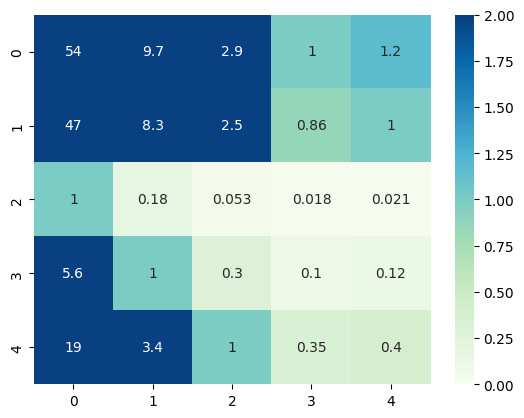

In [5]:
sns.heatmap(np.abs(np.array([[i * j for j in m] for i in l])), 
            annot=True, 
            vmin=0, 
            vmax=2, 
            cmap='GnBu'
           )

In [6]:
v, u #same, but rearranged and in different directions

(array([[ 0.55092721, -0.36342717, -0.580235  ,  0.46749697,  0.09578012],
        [ 0.26358701,  0.43616874, -0.11023301,  0.06593087, -0.85075292],
        [-0.30000755,  0.70174172, -0.29528249,  0.46273151,  0.34094256],
        [ 0.53912095,  0.39813533, -0.18707084, -0.62903048,  0.34664391],
        [-0.49633171, -0.1634758 , -0.72731615, -0.40902311, -0.17504803]]),
 array([[-0.580235  , -0.46749697,  0.09578012, -0.55092721,  0.36342717],
        [-0.11023301, -0.06593087, -0.85075292, -0.26358701, -0.43616874],
        [-0.29528249, -0.46273151,  0.34094256,  0.30000755, -0.70174172],
        [-0.18707084,  0.62903048,  0.34664391, -0.53912095, -0.39813533],
        [-0.72731615,  0.40902311, -0.17504803,  0.49633171,  0.1634758 ]]))

In [7]:
v[0] @ v[2].T

9.71445146547012e-17

### Exercise 13.2

In [8]:
A = imatrix(2)

In [9]:
A

array([[7, 8],
       [3, 3]])

In [10]:
l, u = np.linalg.eig(A)

In [11]:
u 
#Luckily we got matrix with real eigenvectors. It's not guaranteed, but for the sake
# of the experiment we would suggest to repeat matrix generation until one obtains 
# the matrix that satisfies that condition

array([[ 0.92478449, -0.73907611],
       [ 0.38049132,  0.67362193]])

In [12]:
v_1 = A @ u[:, 0]
v_2 = A @ u[:, 1]

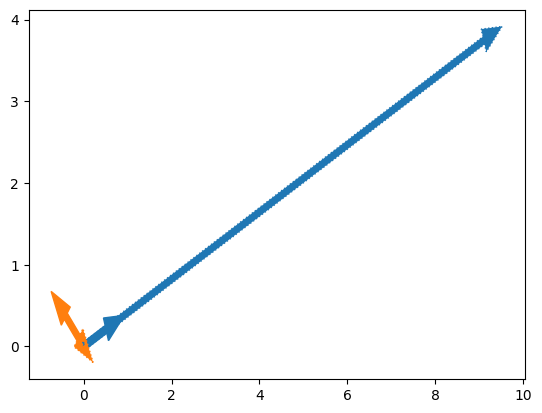

In [13]:
plt.arrow(0, 0, u[0, 0], u[1,0], color='C0', head_width=.3, width=.1, length_includes_head=True,)
plt.arrow(0, 0, u[0, 1], u[1,1], color='C1', head_width=.3, width=.1, length_includes_head=True,)

plt.arrow(0, 0, *v_1, color='C0', ls=':', head_width=.3, width=.1, length_includes_head=True,)
plt.arrow(0, 0, *v_2, color='C1', ls=':', head_width=.3, width=.1, length_includes_head=True,)

In [14]:
np.linalg.norm(u[:, 1])

0.9999999999999999

## Exercise 13.3

In [15]:
A = matrix(5)
A = A.T @ A

In [16]:
A

array([[ 6.2080682 , -2.23117623,  2.45625485,  0.01121837,  3.36420701],
       [-2.23117623,  4.57916554, -2.57550645, -0.60377483, -0.33251212],
       [ 2.45625485, -2.57550645,  4.44214926,  1.99260492,  1.7019373 ],
       [ 0.01121837, -0.60377483,  1.99260492,  1.57591862,  0.30427344],
       [ 3.36420701, -0.33251212,  1.7019373 ,  0.30427344,  2.27287698]])

In [17]:
l, V = np.linalg.eig(A)

In [18]:
L =l * np.eye(5)

In [42]:
A_ = V @ (l * np.eye(5)) @ np.linalg.inv(V)

In [43]:
frobenius_distance(A, A_)

1.4989058857898484e-14

In [20]:
V

array([[-0.6448028 ,  0.5461134 , -0.16186464, -0.42452925,  0.28207138],
       [ 0.42862223,  0.50687387,  0.68174699, -0.3009621 , -0.06328285],
       [-0.50797074, -0.42590446,  0.45905144, -0.29282492, -0.51390317],
       [-0.14014805, -0.35225773,  0.46994167,  0.10552613,  0.79012156],
       [-0.3504805 ,  0.37330807,  0.27829388,  0.79518208, -0.16745889]])

In [27]:
L_new = np.random.permutation(L) * np.eye(5)

In [28]:
A_new = V @ L_new @ np.linalg.inv(V)

In [29]:
frobenius_distance(A, A_new)

11.802923099003742

In [30]:
l

array([11.45726766,  4.5140593 ,  2.82277137,  0.01629745,  0.26778282])

In [33]:
l_2 = l[[1,0,2,3,4]]

In [34]:
L_2 = l_2 * np.eye(5)

In [35]:
A_2 = V @ L_2 @ np.linalg.inv(V)

In [36]:
frobenius_distance(A, A_2)

9.819179428226812

In [37]:
l_3 = l[[0,1,2,4,3]]

In [38]:
L_3 = l_3 * np.eye(5)

In [39]:
A_3 = V @ L_3 @ np.linalg.inv(V)

In [40]:
frobenius_distance(A, A_3)

0.3556540166654115

Text(0.5, 1.0, 'Reconstruction accuracy')

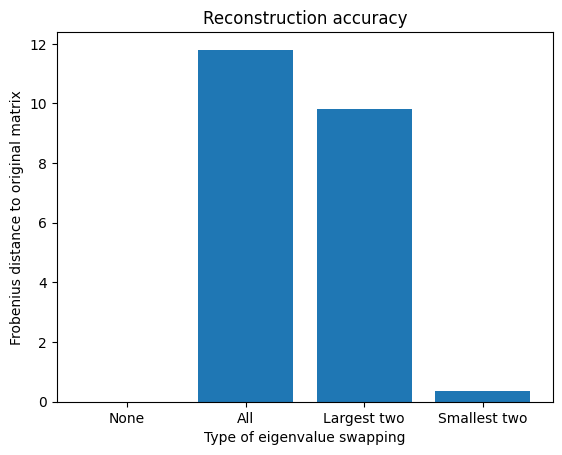

In [47]:
plt.bar(x= range(4), height=[frobenius_distance(A, x) for x in [A_, A_new, A_2, A_3]])
plt.xticks(range(4),labels=['None','All','Largest two','Smallest two'])
plt.ylabel('Frobenius distance to original matrix')
plt.xlabel('Type of eigenvalue swapping')
plt.title('Reconstruction accuracy')
